0.0001801


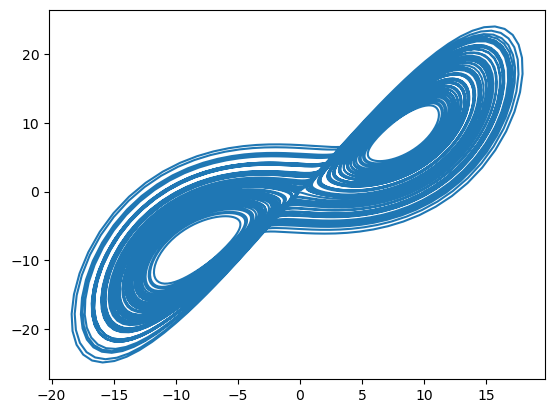

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from dysts.flows import Lorenz, Hadley

## Load and simulate an attractor
model = Lorenz()
print(model.dt)
model.dt = 0.01
sol = model.make_trajectory(10000, resample=False)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

In [5]:
ss = sol + np.random.normal(0,0.01,size=sol.shape)

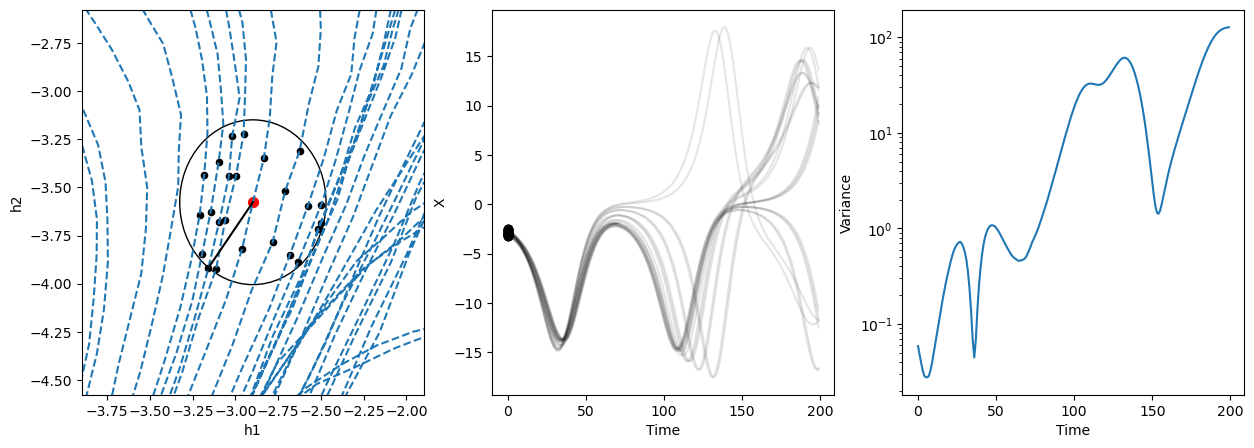

In [11]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
subset = ss[0:5000,0:2]
centr = 350
ax[0].plot(subset[:, 0], subset[:, 1],linestyle='--')
# ax[1].plot(subset[:,0],linestyle='--')
ax[0].scatter(subset[centr,0],subset[centr,1],c='red',s=50)
ax[0].scatter(0,subset[centr,0],c='red',s=30)
# ax[1].scatter(centr,subset[centr,0],c='red',s=50)
ax[0].set_xlim(subset[centr,0]-1,subset[centr,0]+1)
ax[0].set_ylim(subset[centr,1]-1,subset[centr,1]+1)


from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=25)

dists,inds = knn.fit(subset).kneighbors(subset[centr:centr+1])
#
circle1 = plt.Circle((subset[centr,0], subset[centr,1]), dists[0][-1], color='k',fill=False)
ax[0].add_patch(circle1)

T = 200
inds = inds[0][1:]
#add line from center to farthest
farthest = subset[inds[-1]]
centr = subset[centr]
ax[0].plot([centr[0],farthest[0]],[centr[1],farthest[1]],c='k')
for ind in inds:
    ax[0].scatter(subset[ind,0],subset[ind,1],c='k',s=20)
    ax[1].plot(subset[ind:ind+T,0],c='k',alpha=0.1)#,linestyle='.-')
    ax[1].scatter(0,subset[ind,0],c='k')
    # ax[1].scatter(ind,subset[ind,0],c='k',s=10)
# dists,inds
#draw a circle around the max dist


vars = np.zeros(T)
for t in range(T):
    ii = (inds+t)[inds+t < subset.shape[0]]
    vars[t] = np.var(subset[ii,0])

ax[2].plot(vars)
ax[2].set_ylabel("Variance")
ax[1].set_xlabel("Time")
ax[2].set_xlabel("Time")
ax[1].set_ylabel("X")
ax[0].set_xlabel("h1")
ax[0].set_ylabel("h2")
ax[2].set_yscale('log')

In [80]:
help(Lorenz)

Help on class Lorenz in module dysts.flows:

class Lorenz(dysts.base.DynSys)
 |  Lorenz(**kwargs)
 |
 |  Method resolution order:
 |      Lorenz
 |      dysts.base.DynSys
 |      dysts.base.BaseDyn
 |      builtins.object
 |
 |  Data and other attributes defined here:
 |
 |  __annotations__ = {}
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from dysts.base.DynSys:
 |
 |  __call__(self, X, t)
 |      Wrapper around right hand side
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  jac(self, X, t)
 |      The Jacobian of the dynamical system
 |
 |  make_trajectory(self, n, method='Radau', resample=True, pts_per_period=100, return_times=False, standardize=False, postprocess=True, noise=0.0, **kwargs)
 |      Generate a fixed-length trajectory with default timestep, parameters, and initial conditions
 |
 |      Args:
 |          n (int): the total number of trajectory points
 | 

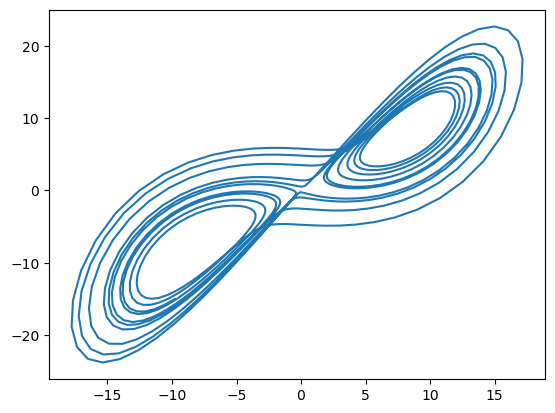

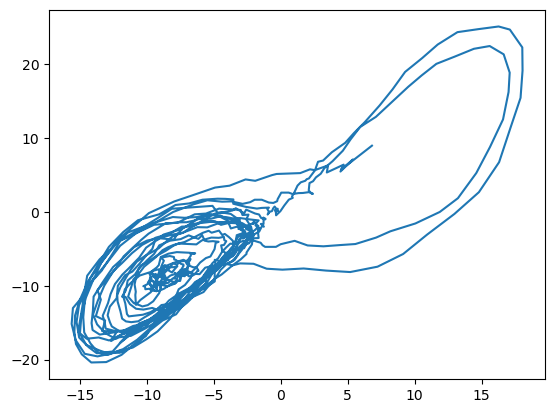

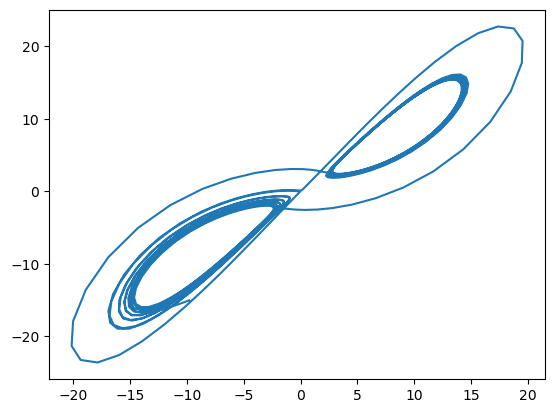

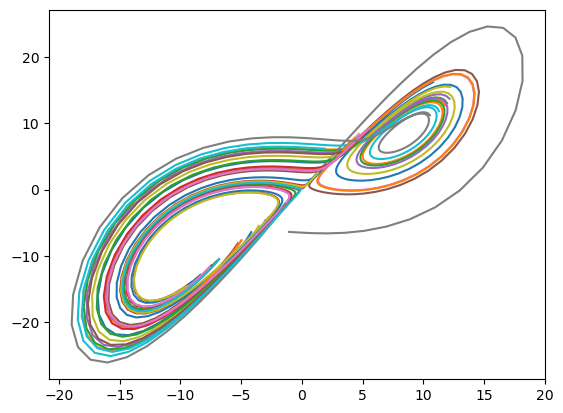

In [6]:
from dysts.flows import *

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Simulate with noise
sol = model.make_trajectory(1000, resample=True, noise=0.2)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Change a parameter value
model.sigma *= 2
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

# ## Solve for multiple initial conditions
model = Lorenz()
model.ic = model.ic[None, :] * np.random.random(20)[:, None]
sol = model.make_trajectory(100, resample=True)
plt.figure()
plt.plot(sol[..., 0].T, sol[..., 1].T);

(1000, 10)


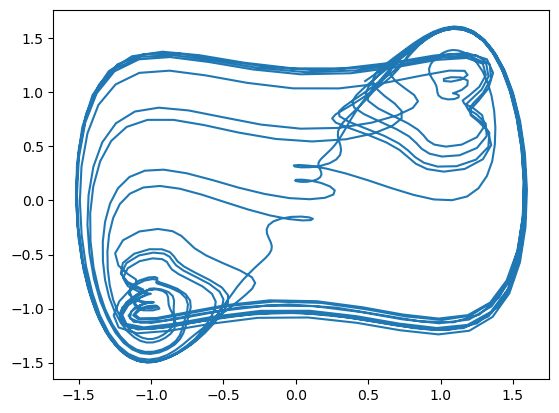

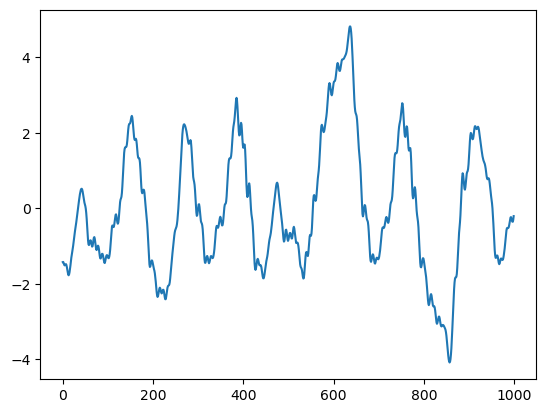

In [57]:
## Load and simulate an attractor
model = PiecewiseCircuit()
sol = model.make_trajectory(1000, resample=True, standardize=True)
plt.figure()

print(sol.shape)
w = np.random.random((sol.shape[-1], 1))

plt.plot(sol[:, 0], sol[:, 1])

plt.figure()

plt.plot(sol @ w)

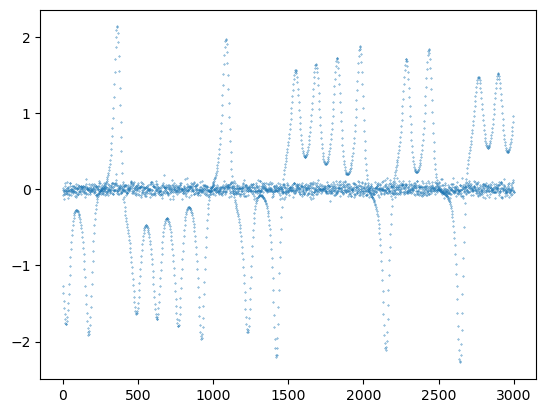

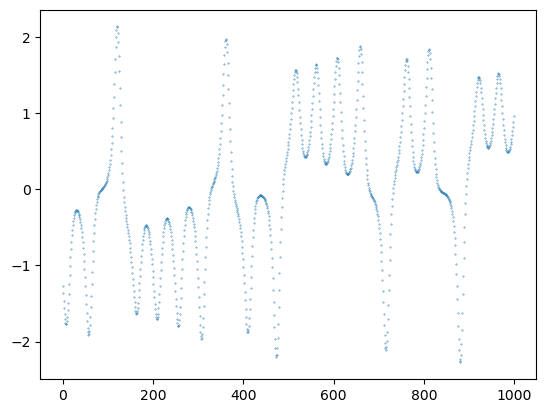

In [84]:
# add n steps of guassian noise in between samples
n_noise = 2
model = Lorenz()
sol = model.make_trajectory(1000, resample=True, standardize=True)
full_data = np.zeros((sol.shape[0] * (n_noise + 1), sol.shape[1]))
for i in range(sol.shape[0]):
    full_data[i * (n_noise + 1)] = sol[i]
    for j in range(n_noise):
        full_data[i * (n_noise + 1) + j + 1] = np.random.normal(0, 0.05, sol.shape[1])

plt.figure()
plt.scatter(np.arange(full_data.shape[0]), full_data[:, 0], s=0.1)
plt.figure()
plt.scatter(
    np.arange(full_data.shape[0] // (n_noise + 1)), full_data[:: n_noise + 1, 0], s=0.1
)

In [43]:
from dysts.base import get_attractor_list

attractors = get_attractor_list()
attractors

['Aizawa',
 'AnishchenkoAstakhov',
 'Arneodo',
 'ArnoldBeltramiChildress',
 'ArnoldWeb',
 'AtmosphericRegime',
 'BeerRNN',
 'BelousovZhabotinsky',
 'BickleyJet',
 'Blasius',
 'BlinkingRotlet',
 'BlinkingVortex',
 'Bouali',
 'Bouali2',
 'BurkeShaw',
 'CaTwoPlus',
 'CaTwoPlusQuasiperiodic',
 'CellCycle',
 'CellularNeuralNetwork',
 'Chen',
 'ChenLee',
 'Chua',
 'CircadianRhythm',
 'CoevolvingPredatorPrey',
 'Colpitts',
 'Coullet',
 'Dadras',
 'DequanLi',
 'DoubleGyre',
 'DoublePendulum',
 'Duffing',
 'ExcitableCell',
 'Finance',
 'FluidTrampoline',
 'ForcedBrusselator',
 'ForcedFitzHughNagumo',
 'ForcedVanDerPol',
 'GenesioTesi',
 'GuckenheimerHolmes',
 'Hadley',
 'Halvorsen',
 'HastingsPowell',
 'HenonHeiles',
 'HindmarshRose',
 'Hopfield',
 'HyperBao',
 'HyperCai',
 'HyperJha',
 'HyperLorenz',
 'HyperLu',
 'HyperPang',
 'HyperQi',
 'HyperRossler',
 'HyperWang',
 'HyperXu',
 'HyperYan',
 'HyperYangChen',
 'IkedaDelay',
 'InteriorSquirmer',
 'IsothermalChemical',
 'ItikBanksTumor',
 'Jerk